In [1]:
import os
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

In [2]:
from PIL import Image

In [3]:
import cmath
import math

In [93]:
import pywt

#### Check io Original Image

In [4]:
img = Image.open("./testImage.jpg")

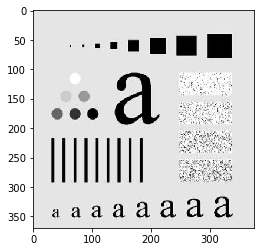

In [4]:
plt.imshow(img,cmap='bone')

In [5]:
img_array = np.asarray(img)

#### (5).a
Write a computer script that lets you input an image and an integer k, 
and outputs a new image which approximates the input image with k DFT coefficients.

##### practice by package

In [28]:
np.asarray(img).shape

(370, 375)

In [43]:
fft_coef = np.fft.fft2(img_array ) 

In [45]:
fft_coef.shape

(370, 375)

In [43]:
fimg =  np.fft.fftshift(fft_coef) # centerize freq=0 in 2D fft image

In [46]:
ifimage = np.fft.ifft2(fft_coef)

In [44]:
mag = np.log(np.abs(fimg))

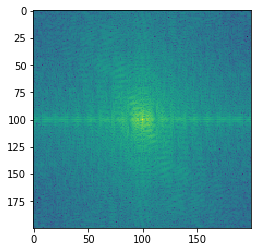

In [45]:
plt.imshow(mag)

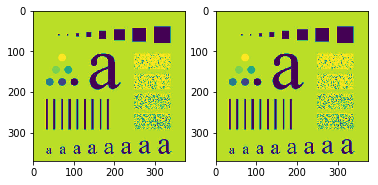

In [48]:
fig = plt.figure()
ax = plt.subplot(121)
plt.imshow(img_array)
ax = plt.subplot(122)
plt.imshow(ifimage.real)

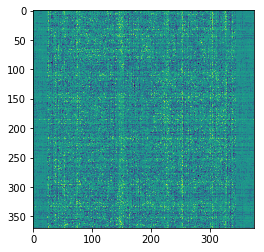

In [49]:
res = img_array - ifimage.real
plt.imshow(res)

In [ ]:
n = k**2
mse = 0
img_array = np.asarray(img)
for i in range(k):
    for j in range(k)
        mse += ( img[i,j] -  )

##### My own code

In [11]:
def k_dft(img, k=0):
    n1 = img.shape[0]
    n2 = img.shape[1]
    F = np.zeros((n1,n2), dtype=np.complex)
    for i1 in range(n1):
        for i2 in range(n2):
            F[i1,i2] = 1/(n1*n2)*img[i1,i2]*cmath.e**(-1j*2*math.pi*(i1*k/n1 + i2*k/n2))
    F_k = np.sum(F, dtype=np.complex)
    return F_k

In [12]:
def k_idft(F_k, img, k=0):
    n1 = img.shape[0]
    n2 = img.shape[1]
    F = np.zeros((n1,n2), dtype=np.complex)
    for i1 in range(n1):
        for i2 in range(n2):
            F[i1,i2] = F_k*cmath.e**(1j*2*math.pi*(i1*k/n1 + i2*k/n2))
    F_k = np.sum(F, dtype=np.complex)
    return F_k

In [67]:
a = k_dft(img_array,k=10)

In [68]:
b = k_idft(a,img_array, k=10)

In [69]:
a

(1.075144850475318+1.134256346745843j)

In [70]:
b

(-2.9665159217984183e-13+2.255973186038318e-13j)

In [78]:
dft_coefs = []
idft_coefs = []
n1 = img_array.shape[0]
n2 = img_array.shape[1]
n = min(n1,n2)
k =0
_k_dft = k_dft(img_array, k=i)
dft_coefs += [_k_dft]
idft_coefs += [k_idft(_k_dft, img_array,k=i)]

In [79]:
dft_coefs,idft_coefs

([(-1.078022474193451-1.0438302423551524j)],
 [(-2.1316282072803006e-13+1.9184653865522705e-13j)])

#### numpy and k-dft coefs

In [80]:
# def(image,k)
#    return image with k-DFT

In [109]:
fft_coef = np.fft.fft2(img_array ) 

In [110]:
filter_matrix = np.zeros(img_array.shape)

In [111]:
k = 1

In [112]:
n1 = img_array.shape[0]
n2 = img_array.shape[1]
for i1 in range(n1):
    for i2 in range(n2):
        if i1 == k or i2 == k:
            filter_matrix[i1,i2] = 1

In [113]:
fft_coef = fft_coef*filter_matrix

In [115]:
fshift = np.fft.fftshift(fft_coef) 

In [116]:
fimg = np.fft.ifft2(fshift)

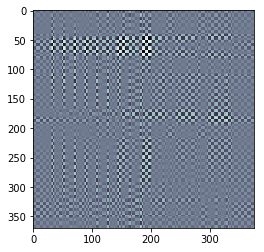

In [117]:
plt.imshow(fimg.real, cmap='bone')

#### Vary K values

In [182]:
def band_path(img,k):
    n1 = img_array.shape[0]
    n2 = img_array.shape[1]
    filter_matrix = np.zeros(img_array.shape)
    for i1 in range(n1):
        for i2 in range(n2):
            if i1 == k and i2 == k:
                filter_matrix[i1,i2] = 1
                print('OK')
    return filter_matrix

In [66]:
def mse(img1, img2):
    n1, n2 = img1.shape
    return 1/(n1*n2)*sum((img1.flatten() - img2.flatten())**2)    

In [176]:
k_lists = []
for ik in range(0,300,5):
    # fft
    fft_coef = np.fft.fft2(img_array)
    filter_matrix = band_path(img_array,ik)
    fft_coef = fft_coef*filter_matrix
    
    # max fft_coef
    mag = np.log(np.abs(fft_coef)+1)
    idx = np.where(mag == np.amax(mag))
    max_coef = np.zeros((img_array.shape))  
    max_coef[idx] = fft_coef[idx]
    
    max_coef = max_coef * filter_matrix
    fshift = np.fft.fftshift(max_coef) 
    fimg = np.fft.ifft2(fshift)
    
    k_lists += [mse(img_array, fimg.real)]

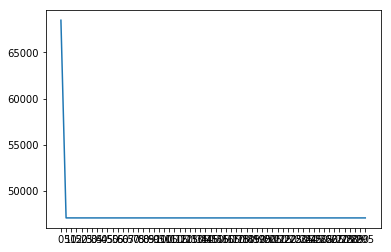

In [177]:
plt.plot([x for x in range(len(k_lists))], k_lists)
plt.xticks([x for x in range(len(k_lists))],
           [str(x) for x in range(0,300,5)])
plt.show()

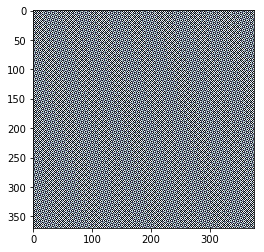

In [178]:
plt.imshow(fimg.real, cmap='bone')

OK
OK
OK
OK
OK


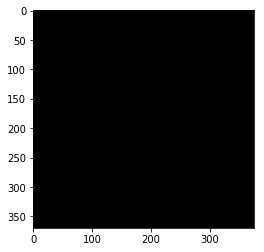

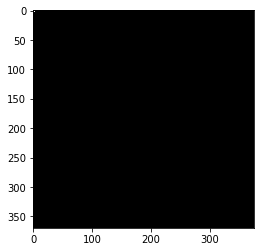

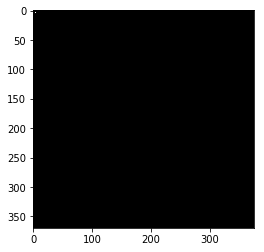

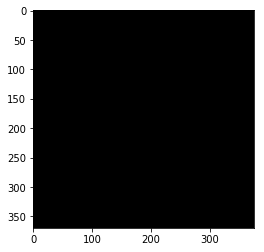

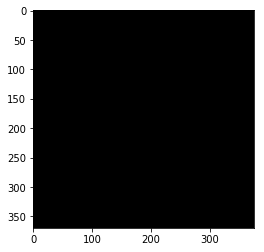

In [183]:
for ik in range(0,10,2):
    plt.figure()
    filter_matrix = band_path(img_array,ik)
    plt.imshow(filter_matrix, cmap='bone')

#### practice

In [184]:
fft_coef = np.fft.fft2(img_array ) 

In [185]:
fimg =  np.fft.fftshift(fft_coef)

In [186]:
ifimage = np.fft.ifft2(fft_coef)

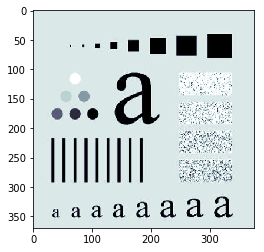

In [187]:
plt.imshow(ifimage.real, cmap='bone')

In [188]:
# if F[-1,-1] = 0
fft_coef[-1:,-1:] = 0
fa = np.fft.ifft2(np.fft.fftshift(fft_coef))

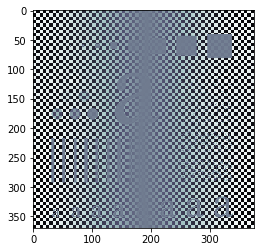

In [189]:
plt.imshow(fa.real, cmap='bone')

In [254]:
# get fft coef
_fft_coef = np.fft.fft2(img_array ) 
fft_coef = np.fft.fft2(img_array ) 

k = 300
if k == 0:
     a = _fft_coef[-1:,-1:]
else :
    # get k value
    a = _fft_coef[-k-1:-k,-k-1:-k]
fft_coef[:,:] = 0.00
print(a)
fft_coef[-k-1:-k,-k-1:-k] = a[0][0]

[[-2600.47724747+3210.74461819j]]


In [255]:
a[0][0]

(-2600.4772474657916+3210.7446181852238j)

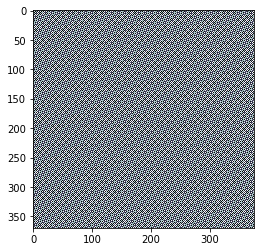

In [256]:
fa = np.fft.ifft2(np.fft.fftshift(fft_coef))
plt.imshow(fa.real, cmap='bone')

#### Functionize

In [257]:
mses = []
for k in range(0,300,10):
    # get fft coef
    _fft_coef = np.fft.fft2(img_array ) 
    fft_coef = np.fft.fft2(img_array ) 

    if k == 0:
         a = _fft_coef[-1:,-1:]
    else :
        # get k value
        a = _fft_coef[-k-1:-k,-k-1:-k]
    fft_coef[:,:] = 0.00
    print(a)
    fft_coef[-k-1:-k,-k-1:-k] = a[0][0]
    fa = np.fft.ifft2(np.fft.fftshift(fft_coef))
    mses += [mse(img_array, fa.real)]

[[-923875.23595819+1033654.00792865j]]
[[-4787.27454287-101608.80133566j]]
[[11724.27331329-15075.57086484j]]
[[6871.61122831+2448.07125713j]]
[[6460.62923618+6978.04839684j]]
[[7830.32301526+8827.24527789j]]
[[2660.03100136-4622.9864327j]]
[[-3504.83038472-4168.24554523j]]
[[2515.7543546+2599.71990156j]]
[[-5894.19438541-9459.61909642j]]
[[2727.37656949-5400.90030254j]]
[[1130.56603539-371.55187959j]]
[[1325.13593605+245.62631762j]]
[[2499.75619235+1192.00144105j]]
[[-1877.27161525-1702.75493692j]]
[[-2546.25370924+1984.40779179j]]
[[-61.55759578-445.37794077j]]
[[-279.48363372+156.02203j]]
[[-737.4291173-2092.11787517j]]
[[-202.19455585-744.96720581j]]
[[1622.71010629+1564.66580675j]]
[[-636.74421122-1210.50014813j]]
[[-484.17617754+1320.02253732j]]
[[-2599.12313795-2970.57356309j]]
[[1356.52699401+891.14842758j]]
[[2396.32464949+1417.94049428j]]
[[10.8137764-534.6964773j]]
[[-1313.27204735-2202.11129518j]]
[[3866.7882837-4937.51479822j]]
[[7363.44293064-575.26079525j]]


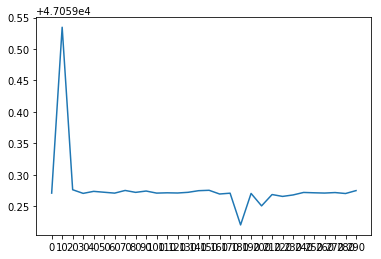

In [258]:
plt.plot([x for x in range(len(mses))], mses)
plt.xticks([x for x in range(len(mses))],
           [str(x) for x in range(0,300,10)])
plt.show()

#### 6

In [260]:
img = Image.open("./cameraman.png")

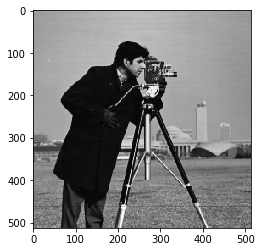

In [261]:
plt.imshow(img,cmap='bone')

In [262]:
img_array = np.asarray(img)

In [271]:
def noise_iid(img, mean=0.0, sigma=1.00):
    nx,ny,nz = img.shape[:3]
    gnoise = np.random.normal(mean, sigma, (nx,ny,nz))
    gnoise = gnoise.reshape(nx,ny,nz)
    return img + gnoise

In [276]:
nimg = noise_iid(img_array, sigma=10)

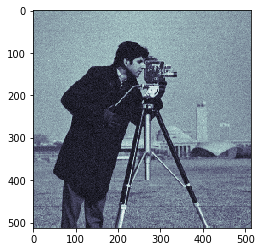

In [277]:
plt.imshow(nimg[:,:,0], cmap='bone')

### new try

In [29]:
fft_coef = np.fft.fft2(img_array) 

In [30]:
fft_coef.shape

(370, 375)

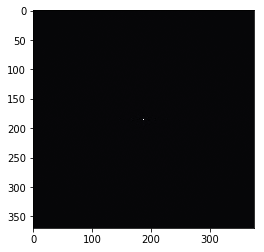

In [23]:
fft_coef =  np.fft.fftshift(fft_coef)
plt.imshow(fft_coef.real, cmap='bone')

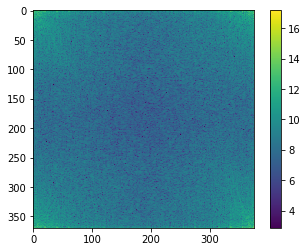

In [33]:
plt.imshow(np.log(np.abs(np.fft.fft2(img_array))+1))
plt.colorbar()

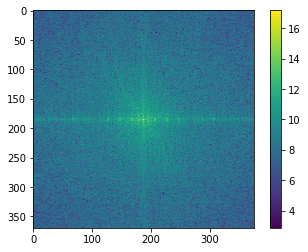

In [34]:
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(img_array)))+1))
plt.colorbar()

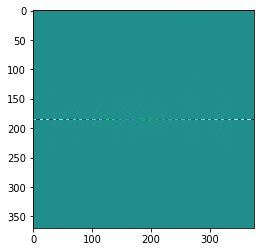

In [36]:
_img = np.fft.fftshift(np.fft.fft2(img_array))
plt.imshow(np.fft.ifft(_img).real)

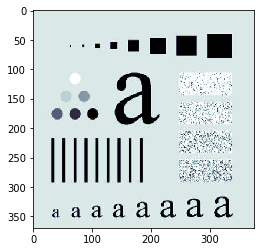

In [31]:
#fft_coef =  np.fft.fftshift(fft_coef)
fimg = np.fft.ifft2(fft_coef)
plt.imshow(fimg.real, cmap='bone')

DO not shift??

In [13]:
np.amax(fft_coef)

(28730500+0j)

In [14]:
a = k_dft(img_array,k=30)
b = k_idft(a, img_array, k=30)

In [15]:
b

(28730499.999999993+0j)

(array([0]), array([0]))

my program and fft pack is same result

from tutorial

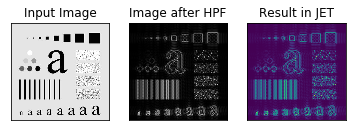

In [42]:
f = np.fft.fft2(img_array)
fshift = np.fft.fftshift(f)

rows, cols = img_array.shape
crow,ccol = int(rows/2) , int(cols/2)
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])

plt.show()

In [52]:
fft_array = np.fft.fft2(img_array)
k = 0
nx, ny = img_array.shape
for ix in range(nx):
    for iy in range(ny):
        if not ix == k:
            if not iy == k:
                fft_array[ix,iy] = 0.00

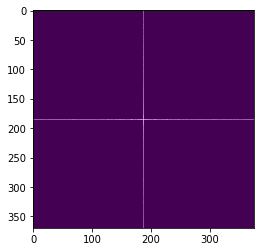

In [45]:
plt.imshow(np.log(np.abs(np.fft.fftshift(fft_array))+1))

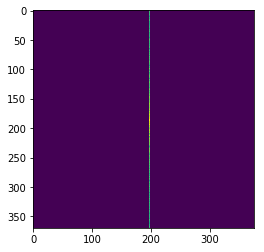

In [47]:
plt.imshow(np.log(np.abs(np.fft.fftshift(fft_array))+1))

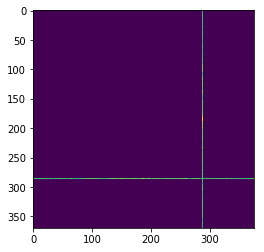

In [50]:
plt.imshow(np.log(np.abs(np.fft.fftshift(fft_array))+1))

k = 0

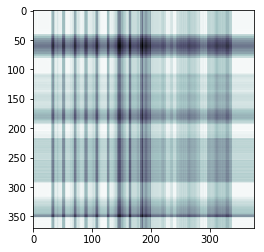

In [44]:
fimg = np.fft.ifft2(fft_array)
plt.imshow(fimg.real, cmap='bone')

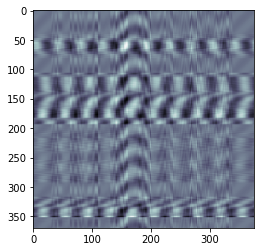

In [48]:
fimg = np.fft.ifft2(fft_array)
plt.imshow(fimg.real, cmap='bone')

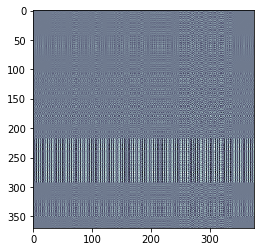

In [51]:
fimg = np.fft.ifft2(fft_array)
plt.imshow(fimg.real, cmap='bone')

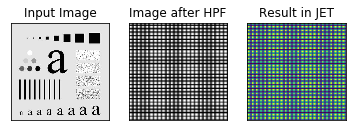

In [58]:
k = 150

f = np.fft.fft2(img_array)
fshift = np.fft.fftshift(f)
fshift[:,:] = 0

rows, cols = img_array.shape
crow,ccol = int(rows/2) , int(cols/2)
dft_coef = k_dft(img_array,k=k)
fshift[crow-k, ccol-k] = dft_coef
fshift[crow+k, ccol-k] = dft_coef
fshift[crow-k, ccol+k] = dft_coef
fshift[crow+k, ccol+k] = dft_coef

f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])

plt.show()

In [74]:
def get_kdft_coef(img_array, k=0):
    # prep dft 2d - array
    rows, cols = img_array.shape
    crow,ccol = int(rows/2) , int(cols/2)
    fshift = np.zeros((rows,cols), dtype=np.complex)

    # compute dft at k-dft coef
    dft_coef = k_dft(img_array,k=k)
    fshift[crow-k, ccol-k] = dft_coef
    fshift[crow+k, ccol-k] = dft_coef
    fshift[crow-k, ccol+k] = dft_coef
    fshift[crow+k, ccol+k] = dft_coef

    # shift back
    f_ishift = np.fft.ifftshift(fshift)
    fimg = np.fft.ifft2(f_ishift)

    # plot
    plt.subplot(121)
    plt.imshow(img_array, cmap = 'bone')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122)
    plt.imshow(fimg.real, cmap = 'bone')
    plt.title('Image k coef F'), plt.xticks([]), plt.yticks([])
    plt.show()
    
    return fimg

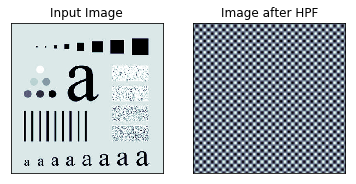

In [65]:
c = get_kdft_coef(img_array, k=20)

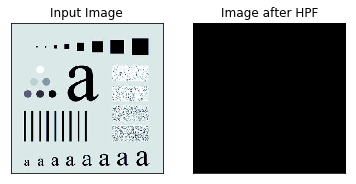

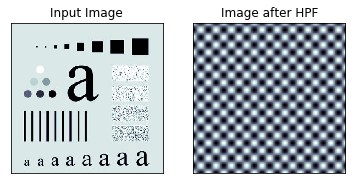

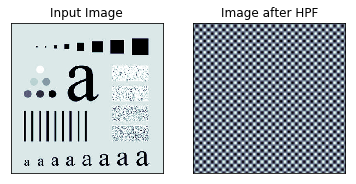

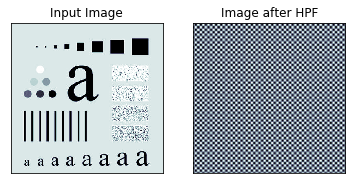

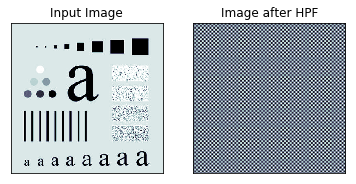

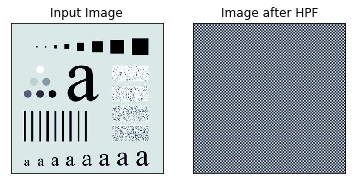

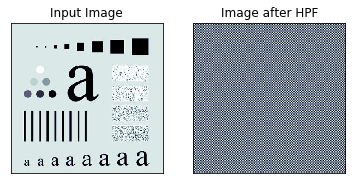

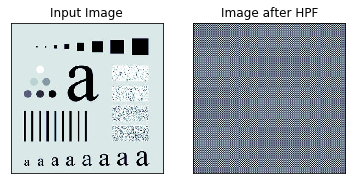

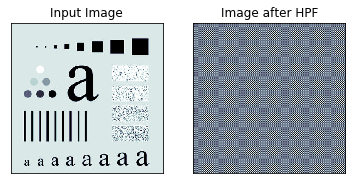

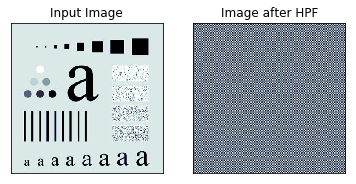

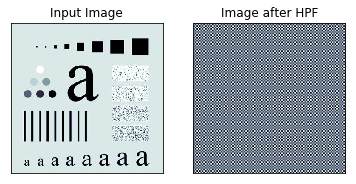

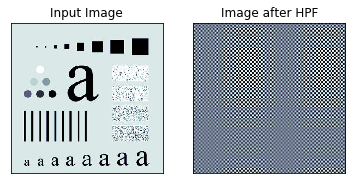

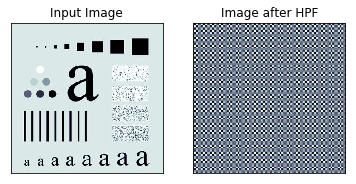

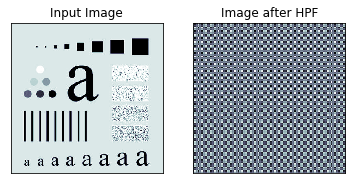

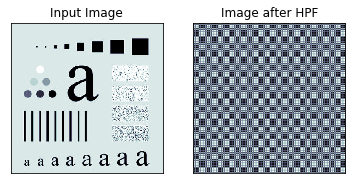

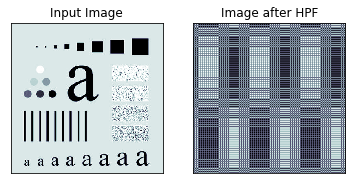

In [72]:
mses = []
for ik in range(0,151,10):
    idft_array = get_kdft_coef(img_array, k=ik)
    mses += [ mse(img_array, idft_array)  ]

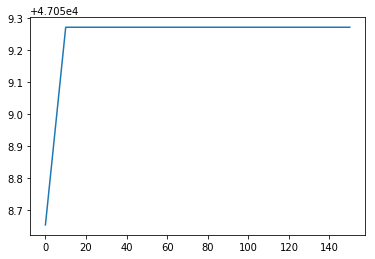

In [78]:
x = [i for i in range(0,151,10)]
#ax = plt.subplot(111)
plt.plot(x, mses)
#ax.set_yscale('log')
plt.show()

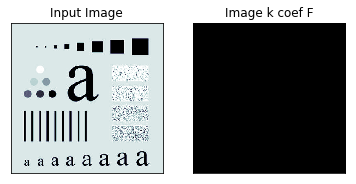

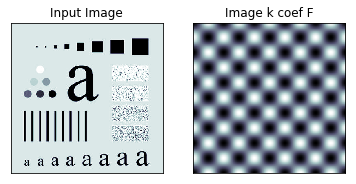

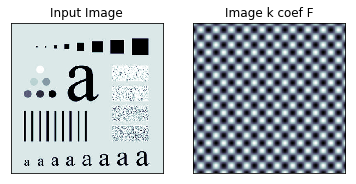

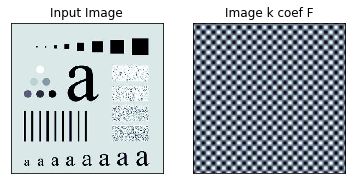

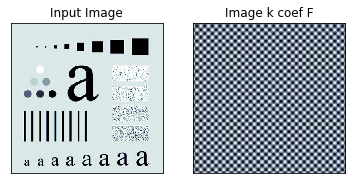

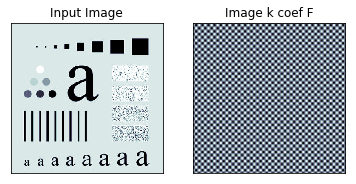

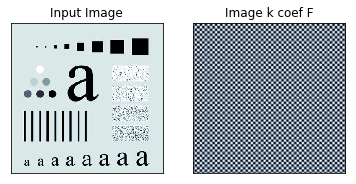

In [75]:
for ik in range(0,31,5):
    idft_array += get_kdft_coef(img_array, k=ik)

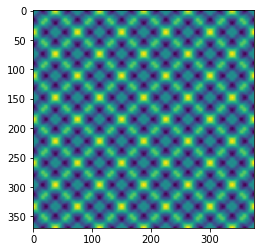

In [76]:
plt.imshow(idft_array.real)

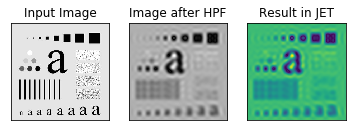

In [83]:
k=15

f = np.fft.fft2(img_array)
fshift = np.fft.fftshift(f)
fshift[:,:]= 0.00
_fshift = np.fft.fftshift(f)

rows, cols = img_array.shape
crow,ccol = int(rows/2) , int(cols/2)
fshift[crow-k:crow+k, ccol-k:ccol+k] = _fshift[crow-k:crow+k, ccol-k:ccol+k] 
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])

plt.show()

In [84]:
def func(img_array, k):
    rows, cols = img_array.shape
    crow,ccol = int(rows/2) , int(cols/2)
    fshift= np.zeros((rows, cols), dtype=np.complex)
    _fshift = np.fft.fftshift(f)

    fshift[crow-k:crow+k, ccol-k:ccol+k] = _fshift[crow-k:crow+k, ccol-k:ccol+k] 
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back

In [89]:
mses = []
for ik in range(0,151,2):
    idft_array = func(img_array, k=ik)
    mses += [ mse(img_array, idft_array)  ]

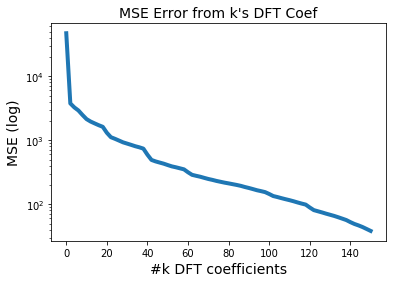

In [92]:
x = [i for i in range(0,151,2)]
ax = plt.subplot(111)
plt.plot(x, mses, linewidth=4)
ax.set_yscale('log')
ax.set_title("MSE Error from k's DFT Coef", fontsize=14)
ax.set_xlabel("#k DFT coefficients", fontsize=14)
ax.set_ylabel("MSE (log)", fontsize=14)
plt.show()

### haar filter

In [94]:
cA, (cH, cV, cD)  = pywt.dwt2(img_array, 'haar')

In [99]:
coefs = pywt.dwt2(img_array, 'haar')

In [95]:
cA.shape

(185, 188)

In [96]:
cH.shape

(185, 188)

In [97]:
cV.shape

(185, 188)

(array([ 2324.,   209.,   290.,   293.,   223.,   387.,   656.,   761.,
        24491.,  5146.]),
 array([  0.,  51., 102., 153., 204., 255., 306., 357., 408., 459., 510.]),
 <a list of 10 Patch objects>)

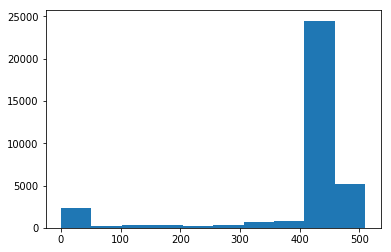

In [98]:
plt.hist(cA.flatten())

In [108]:
pywt.threshold(cA, 458, 'hard')

array([[459.,   0.,   0., ..., 458., 458., 458.],
       [459.,   0.,   0., ..., 458., 458., 458.],
       [459.,   0.,   0., ..., 458., 458., 458.],
       ...,
       [459.,   0.,   0., ..., 458., 458., 458.],
       [459.,   0.,   0., ..., 458., 458., 458.],
       [459.,   0.,   0., ..., 458., 458., 458.]])

In [114]:
_cA = pywt.threshold(cA, np.percentile(cA,50), 'hard')

In [119]:
_cH = pywt.threshold(cH, np.percentile(cH,50), 'hard')

In [120]:
_cV = pywt.threshold(cV, np.percentile(cV,50), 'hard')

In [121]:
_cD = pywt.threshold(cD, np.percentile(cD,50), 'hard')

In [122]:
_idwt = pywt.idwt2((_cA,(_cH,_cV,_cD)), 'haar')

In [123]:
_idwt.shape

(370, 376)

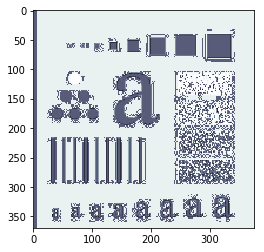

In [124]:
plt.imshow(_idwt, cmap='bone')